In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import numpy.linalg as LA
import pandas as pd

In [2]:
import Function as f

In [3]:
absdd = np.array([1,-1,-1,1,1,-1,-1,-1,1,-1])[:,np.newaxis].T
print(absdd.shape)
print(f.Weighted_Ages(absdd))

(1, 10)
[4.333333333333333]


In [4]:
np.random.seed(200)

Hyper parameter

In [5]:
max_iteration = 15000
weight_decay = 1e-3
Epsilons = [10,10]
BANDWIDTH = 0.5

In [6]:
filename = "5000(4500+500)3.csv"
(X, X_train, X_val), (Y, Y_train, Y_val), (survival_times)= f.read_files(filename)
NUM_TRAIN = X_train.shape[0]
NUM_VAL = X_val.shape[0]
NUM_EMPLOYEES = X.shape[0]

[ 2. 44.  8. ... 14. 63.  9.]


In [7]:
# Kernel_Matrix = f.Generating_Kernel(X, "Gaussian_Kernel", BW = BANDWIDTH)
Kernel_Matrix = f.Generating_Kernel(X, "Quick_Gaussian_Kernel", BW = BANDWIDTH)
Kernel_Matrix_Train = Kernel_Matrix[:NUM_TRAIN,:NUM_TRAIN]
Kernel_Matrix_Val = Kernel_Matrix[NUM_TRAIN:,:NUM_TRAIN]

The Stochastic sub-Gradient Descent is shown below

There are  22769680 pairs of samples of similarity between 0.0 and 0.1 which have an average age_gap  28.84359955871141 and the median is: 20.0
There are  843328 pairs of samples of similarity between 0.1 and 0.2 which have an average age_gap  21.534778876071943 and the median is: 13.0
There are  451924 pairs of samples of similarity between 0.2 and 0.3 which have an average age_gap  20.733025907010912 and the median is: 12.0
There are  294474 pairs of samples of similarity between 0.3 and 0.4 which have an average age_gap  20.058742028158683 and the median is: 12.0
There are  207262 pairs of samples of similarity between 0.4 and 0.5 which have an average age_gap  19.46592235913964 and the median is: 11.0
There are  151454 pairs of samples of similarity between 0.5 and 0.6 which have an average age_gap  19.032221004397375 and the median is: 11.0
There are  111980 pairs of samples of similarity between 0.6 and 0.7 which have an average age_gap  18.49301661010895 and the median is: 11.0


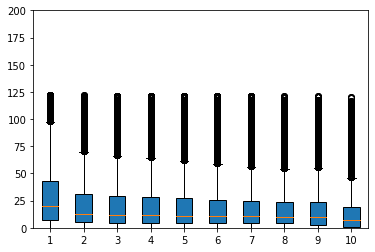

In [8]:
f.Validate_Synthetic_DataSet(Kernel_Matrix, survival_times)

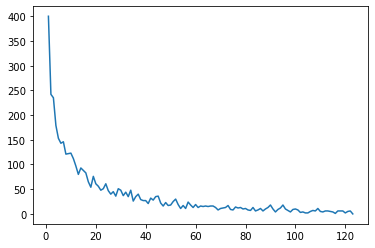

In [9]:
NUM_TASKS = Y.shape[1]
x_axis = np.arange(NUM_TASKS)+1
y_train_gt_axis = np.zeros(NUM_TASKS)
for i in range(NUM_TASKS):
    y_train_gt_axis[i] = np.sum(survival_times[:NUM_TRAIN] == x_axis[i])
plt.plot(x_axis, y_train_gt_axis)

In [10]:
print(NUM_TASKS)
## DEL TOP 5%

123


In [ ]:
alpha = np.zeros_like(Y_train)
beta = np.zeros((NUM_TRAIN,NUM_TASKS,NUM_TASKS))
for t in range(1, max_iteration + 1):
    alpha, beta = f.new_C2(Kernel_Matrix_Train, Y_train, alpha, beta, 1, t, weight_decay, checking = True)
    
    if t%500 == 0: 
        print("the iteration is:", t)
        hatY_train = Kernel_Matrix_Train.dot(alpha*Y_train) 
        for i in range(NUM_TRAIN):
            hstack_M_K_i = Kernel_Matrix_Train[i].repeat(NUM_TASKS).reshape(NUM_TRAIN, NUM_TASKS)
            hatY_train += hstack_M_K_i.dot(beta[i, :, :])
        hatY_train /= ( t * weight_decay )
        
        hatY_val =  Kernel_Matrix_Val.dot(alpha*Y_train) 
        for i in range(NUM_TRAIN):
            hstack_M_K_i = Kernel_Matrix_Val[:,i].repeat(NUM_TASKS).reshape(NUM_VAL, NUM_TASKS)
            hatY_val += hstack_M_K_i.dot(beta[i, :, :])
        hatY_val /= ( t * weight_decay )
        
        predict_age_tr = f.Weighted_Ages(hatY_train)
        predict_age_val = f.Weighted_Ages(hatY_val)
        # predict_age_tr0 = f.Ages(hatY_train)
        # predict_age_val = f.Ages(hatY_val)
        predict_age = predict_age_tr + predict_age_val
            
        acc_train = np.sum(Y_train * hatY_train > 0) / (NUM_TRAIN * NUM_TASKS)
        acc_val = np.sum(Y_val * hatY_val > 0) / (NUM_VAL * NUM_TASKS)
        print("the train accuracy is:", acc_train)
        print("the val accuracy is:", acc_val)
        
        # C_index_tr = f.Calculate_C_index(survival_times[:NUM_TRAIN], predict_age_tr)
        C_index_val = f.Calculate_C_index(survival_times[NUM_TRAIN:], predict_age_val)
         
        # print("the c-index for training is:", C_index_tr)xx
        print("the c-index for val is:", C_index_val)

the iteration is: 500
the train accuracy is: 0.857286359530262
the val accuracy is: 0.8610243902439024
82949 121380.0
the c-index for val is: 0.6833827648706542
the iteration is: 1000
the train accuracy is: 0.8664697380307136
the val accuracy is: 0.8644552845528455
85328 121380.0
the c-index for val is: 0.7029823694183556
the iteration is: 1500
the train accuracy is: 0.869286359530262
the val accuracy is: 0.8671056910569106
85748 121380.0
the c-index for val is: 0.7064425770308124
the iteration is: 2000
the train accuracy is: 0.8693694670280037
the val accuracy is: 0.8651544715447155
86529 121380.0
the c-index for val is: 0.7128769154720712
the iteration is: 2500
the train accuracy is: 0.871297199638663
the val accuracy is: 0.8690243902439024
87599 121380.0
the c-index for val is: 0.7216922062942824
the iteration is: 3000
the train accuracy is: 0.871223125564589
the val accuracy is: 0.8685853658536585
87165 121380.0
the c-index for val is: 0.7181166584280771
the iteration is: 3500
the 

In [ ]:
x_axis = np.arange(NUM_TASKS)+1 # the x axis
y_train_gt_axis = np.zeros(NUM_TASKS) # the ground truth train axis
y_val_gt_axis = np.zeros(NUM_TASKS) # the groud truth validation axis 
y_train_predict_axis = np.zeros(NUM_TASKS) # the predict train axis 
y_val_predict_axis = np.zeros(NUM_TASKS) # the predict validation axis 

for i in range(NUM_TASKS):
    y_train_gt_axis[i] = np.sum(survival_times[:NUM_TRAIN] == x_axis[i])
    y_val_gt_axis[i] = np.sum(survival_times[NUM_TRAIN:] == x_axis[i])
    y_train_predict_axis[i] = np.sum(predict_age[:NUM_TRAIN] == x_axis[i])
    y_val_predict_axis[i] = np.sum(predict_age[NUM_TRAIN:] == x_axis[i])
plt.plot(x_axis, y_train_gt_axis, x_axis, y_train_predict_axis) # the training set: ground truth vs predict situation
# plt.plot(x_axis, y_val_gt_axis, x_axis, y_val_predict_axis) # the valiadtion set: ground truth vs predictsituation
plt.subplot(221)
plt.plot(x_axis, y_val_gt_axis)
plt.subplot(222)
plt.plot(x_axis, y_val_predict_axis)
plt.subplot(223)
plt.plot(x_axis, y_train_gt_axis)
plt.subplot(224)
plt.plot(x_axis, y_train_predict_axis)
# plt.plot(x_axis,y_train_predict_axis,y_val_predict_axis)

In [ ]:
print(survival_times[NUM_TRAIN:])
print(predict_age[NUM_TRAIN:])

In [ ]:
print(predict_age[NUM_TRAIN:])
print(survival_times[NUM_TRAIN:])
print(np.sum(predict_age[NUM_TRAIN:] > survival_times[NUM_TRAIN:]))
print(np.sum(predict_age[NUM_TRAIN:] < survival_times[NUM_TRAIN:]))
print(np.sum(predict_age[NUM_TRAIN:] == survival_times[NUM_TRAIN:]))

In [ ]:
hatY_train =  Kernel_Matrix_Train.dot(alpha*Y_train) / (max_iteration * weight_decay )

In [ ]:
hatY_val =  Kernel_Matrix_Val.dot(alpha*Y_train) / (max_iteration * weight_decay )

In [ ]:
hatY_val =  Kernel_Matrix_Val.dot(alpha*Y_train) 
for i in range(NUM_TRAIN):
    hstack_M_K_i = Kernel_Matrix_Val[:,i].repeat(NUM_TASKS).reshape(NUM_VAL, NUM_TASKS)
    hatY_val += hstack_M_K_i.dot(beta[i, :, :])
hatY_val /= ( max_iteration * weight_decay )


In [ ]:
hatY_train =  Kernel_Matrix_Train.dot(alpha*Y_train) 
for i in range(NUM_TRAIN):
    hstack_M_K_i = Kernel_Matrix_Train[:,i].repeat(NUM_TASKS).reshape(NUM_TRAIN, NUM_TASKS)
    hatY_val += hstack_M_K_i.dot(beta[i, :, :])
hatY_val /= ( max_iteration * weight_decay )



In [ ]:
violate = 0
for i in range(NUM_TRAIN):
    if np.argwhere(hatY_train[i] < 0) != []:
        minus_list = np.argwhere(hatY_train[i] < 0)
        first_minus = minus_list[0]
        after_pos_list = np.argwhere(hatY_train[i, first_minus:] > 0)
        # print(after_pos_list)
        if len(after_pos_list):
            # print(after_pos_list)
            violate += 1

print(violate)
print(NUM_TRAIN)
# print(survival_times[-NUM_VAL])

In [ ]:
violate = 0
for i in range(NUM_VAL):
    if np.argwhere(hatY_val[i] < 0) != []:
        minus_list = np.argwhere(hatY_val[i] < 0)
        first_minus = minus_list[0]
        after_pos_list = np.argwhere(hatY_val[i, first_minus:] > 0)
        if len(after_pos_list):
            # print(after_pos_list)
            violate += 1

print(violate)
print(NUM_VAL)
# print(survival_times[-NUM_VAL])


In [ ]:
print(hatY_val)

In [ ]:
validation_age = predict_age[NUM_TRAIN:]
tr_age = predict_age[:NUM_TRAIN]
train_vs_validation_samples = Kernel_Matrix[:NUM_TRAIN,NUM_TRAIN:]
train_vs_train_samples = Kernel_Matrix_Train
train_id = 11
plt.xlim(0,1)
age_gap_list = np.zeros(100)
num_list = np.zeros(100)
for i in range(NUM_TRAIN):
    for j in range(NUM_VAL):
        interval_id = np.int(np.floor((train_vs_validation_samples[i,j] / 0.01)))
        age_gap = abs(validation_age[j] - tr_age[i])
        age_gap_list[interval_id] += age_gap
        num_list += 1
avg_age_gap_list = age_gap_list/num_list
plt.plot(np.linspace(0,1, num = 100),avg_age_gap_list)
# plt.scatter(np.linspace(0,1, num = 100), avg_age_gap_list)
# plt.scatter(train_vs_train_samples[train_id],abs(tr_age-survival_times[train_id]))
# plt.scatter(train_vs_validation_samples[train_id], abs(validation_age-survival_times[train_id]))
# print(train_vs_validation_samples[train_id])